In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
data = pd.read_csv("/workspaces/codespaces-blank/data/Rating_Survey_preferences_people.csv")

In [115]:
data.head(2)

,Timestamp,Username,Age,Gender,Height,Weight,Work Crieteria,Main Meal,Rating Of Selected Items of Main Meal [Selected Food],NUTRITIVE VALUE FOR (SNACK),...,NUTRITIVE VALUE FOR (PULSE + VEGETABLE PRODUCT) (1 SMALL BOWL),Rating Of Selected Item Of NUTRITIVE VALUE FOR (PULSE + VEGETABLE PRODUCT) [Selected Food],NUTRITIVE VALUE FOR (CEREAL + PULSE + VEGETABLE PRODUCTS) (1 SMALL BOWL),Rating Of Selected Item of NUTRITIVE VALUE FOR (CEREAL + PULSE + VEGETABLE PRODUCTS) [Selected Food],NUTRITIVE VALUE FOR (MILK + PULSE PRODUCT) (1 SMALL BOWL),Rating Of Selected Item NUTRITIVE VALUE FOR (MILK + PULSE PRODUCT) [Selected Food],NUTRITIVE VALUE FOR (OIL SEEDS PRODUCT),Rating Of Selected Item Of NUTRITIVE VALUE FOR (OIL SEEDS PRODUCT) [Selected Food],NUTRITIVE VALUE FOR (RAW FRUITS) (1 MEDIUM SIZE),Rating of Selected Item of NUTRITIVE VALUE FOR (RAW FRUITS) [Selected Food]
0,2023/10/04 1:17:44 PM GMT+5:30,aakashshingadia45@gmail.com,41,Male,"5'7""",70,Moderately active: moderate exercise/sports 3-...,"Rotla (Bajra)(1 Medium Size) Proteins= 3.65 ,...",9,Khakhra(1 Pieces) (1 Medium Size) Proteins=3....,...,Undhiyu(1 Small Bowl) Proteins = 6.8 Carbs=1...,9,VaghareliKhichadi(1 Small Bowl) Proteins = 3.4...,6,Kadhi(1 Small Bowl) Proteins = 2.98 Carbs=5.3...,8,Groundnut chikki(1 Small Piece) Proteins = 1.3...,9,Avocado Fruit (Sliced) (1 Medium Size) Protein...,9
1,2023/10/04 1:20:00 PM GMT+5:30,sketchofficial028@gmail.com,22,Male,6fits,55,Light activity: light exercise/sports 1-3 days...,"Roti (1 Medium Size) Proteins= 3.01, Carbs= 17...",7,Khakhra(1 Pieces) (1 Medium Size) Proteins=3....,...,Undhiyu(1 Small Bowl) Proteins = 6.8 Carbs=1...,10,VaghareliKhichadi(1 Small Bowl) Proteins = 3.4...,6,Kadhi(1 Small Bowl) Proteins = 2.98 Carbs=5.3...,7,Groundnut chikki(1 Small Piece) Proteins = 1.3...,8,Pineapple(1 Medium Size) Proteins = 3.63 Car...,Column 10


In [116]:
# data.info
data.columns

Index(['Timestamp', 'Username', 'Age', 'Gender', 'Height', 'Weight',
       'Work Crieteria', 'Main Meal',
       'Rating Of  Selected Items of  Main Meal [Selected Food]',
       'NUTRITIVE VALUE FOR (SNACK)',
       'Rating Of  Selected Items of  NUTRITIVE VALUE FOR (SNACK) [Selected Food]',
       'NUTRITIVE VALUE FOR (MAIN MEAL) DAL & SUBJI (COUNTED \nTHE NUTRITIVE VALUE FOR 1 BOWL)   ',
       'Rating Of Selected Item of    NUTRITIVE VALUE FOR (MAIN MEAL) DAL & SUBJI  [Selected Food]',
       'NUTRITIVE VALUE FOR (SNACKS)  ',
       'Rating Of Selected Item of  NUTRITIVE VALUE FOR (SNACKS)   [Selected Food]',
       'NUTRITIVE VALUE FOR (LEAFY VEGETABLES) (1 SMALL BOWL)  ',
       'Rating Of Selected Item of    NUTRITIVE VALUE FOR (LEAFY VEGETABLES)  [Selected Food]',
       'NUTRITIVE VALUE FOR (OTHER VEGETABLES) (1 SMALL BOWL)  ',
       'Rating Of Selected Item Of   NUTRITIVE VALUE FOR (OTHER VEGETABLES)  [Selected Food]',
       '  NUTRITIVE VALUE FOR (SAMBHARA) (2 TABLE SPOON

In [117]:
len(data)

375

In [118]:
data['Timestamp']

0       2023/10/04 1:17:44 PM GMT+5:30
1       2023/10/04 1:20:00 PM GMT+5:30
2       2023/10/04 1:20:20 PM GMT+5:30
3       2023/10/04 1:21:11 PM GMT+5:30
4       2023/10/04 1:23:25 PM GMT+5:30
                    ...               
370     2023/12/01 9:39:20 PM GMT+5:30
371    2023/12/01 11:50:27 PM GMT+5:30
372    2023/12/01 11:59:29 PM GMT+5:30
373     2023/12/02 8:53:01 AM GMT+5:30
374     2023/12/02 8:54:38 AM GMT+5:30
Name: Timestamp, Length: 375, dtype: object

In [119]:
print(data.describe())

       Rating Of  Selected Items of  Main Meal [Selected Food]  \
count                                         375.000000         
mean                                            8.189333         
std                                             1.576530         
min                                             1.000000         
25%                                             8.000000         
50%                                             9.000000         
75%                                             9.000000         
max                                            10.000000         

       Rating Of  Selected Items of  NUTRITIVE VALUE FOR (SNACK) [Selected Food]  \
count                                         375.000000                           
mean                                            7.608000                           
std                                             1.811561                           
min                                             1.000000             

In [120]:
# print(data.isnull().sum())

In [121]:
df = data

In [122]:
df['Height'].head(20)

0        5'7"
1       6fits
2     149.9cm
3        5'4"
4         5'2
5        5'6"
6       150cm
7       5fits
8        5'2"
9     148.6cm
10      160cm
11        5.5
12          5
13        5.6
14        4.8
15       5'3"
16        5.4
17       5'3"
18       5'3"
19       5'3"
Name: Height, dtype: object

In [123]:
# Function to convert various height formats to centimeters
def convert_to_cm(height):
    if 'cm' in height:
        return float(re.search(r'\d+\.?\d*', height).group())
    elif 'fits' in height:
        return np.nan  # or handle it as needed
    elif "'" in height:
        match = re.match(r'(\d+)\'(\d+)\"', height)
        if match:
            feet = float(match.group(1))
            inches = float(match.group(2))
            return (feet * 30.48) + (inches * 2.54)
        else:
            return np.nan
    else:
        try:
            return float(height)
        except ValueError:
            return np.nan  # or handle it as needed
# Apply the conversion function to the 'Height' column
# df['Height'] = df['Height'].apply(convert_to_cm)

In [124]:
df['Height'].head(10)

0       5'7"
1      6fits
2    149.9cm
3       5'4"
4        5'2
5       5'6"
6      150cm
7      5fits
8       5'2"
9    148.6cm
Name: Height, dtype: object

In [125]:
def convert_to_kg(weight):
    try:
        if 'kg' in weight:
            return float(re.search(r'\d+\.?\d*', weight).group())
        else:
            # Assuming numeric values without 'kg' are in kilograms
            return float(weight)
    except AttributeError:
        raise ValueError(f"Unable to extract numeric value from weight: {weight}")
    except ValueError:
        raise ValueError(f"Invalid numeric value in weight: {weight}")
    
df['Weight'] = df['Weight'].apply(convert_to_kg)

In [126]:
df['Weight'].head(20)

0     70.00
1     55.00
2     51.09
3     68.00
4     60.00
5     72.00
6     65.00
7     85.00
8     67.00
9     54.00
10    61.00
11    84.00
12    50.00
13    75.00
14    40.00
15    55.00
16    70.00
17    55.00
18    55.00
19    55.00
Name: Weight, dtype: float64

In [127]:
# Feature engineering: Calculate BMI
df['Age']

0      41
1      22
2      43
3      38
4      56
       ..
370    50
371    46
372    41
373    35
374    56
Name: Age, Length: 375, dtype: object

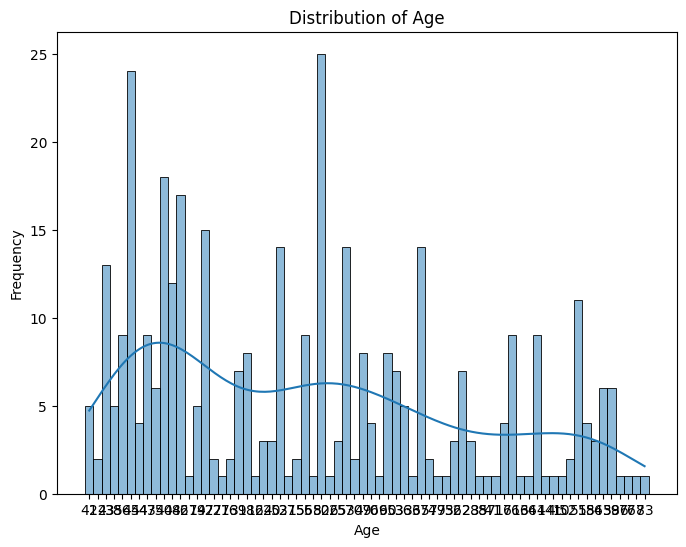

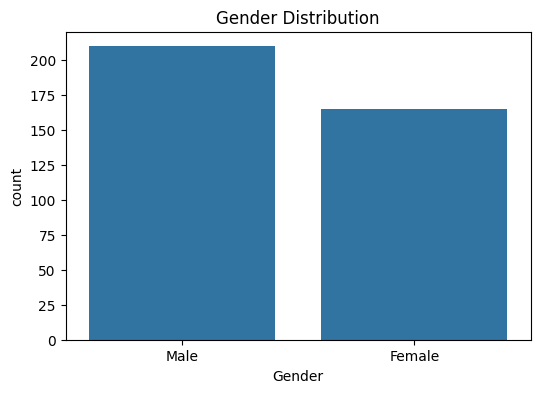

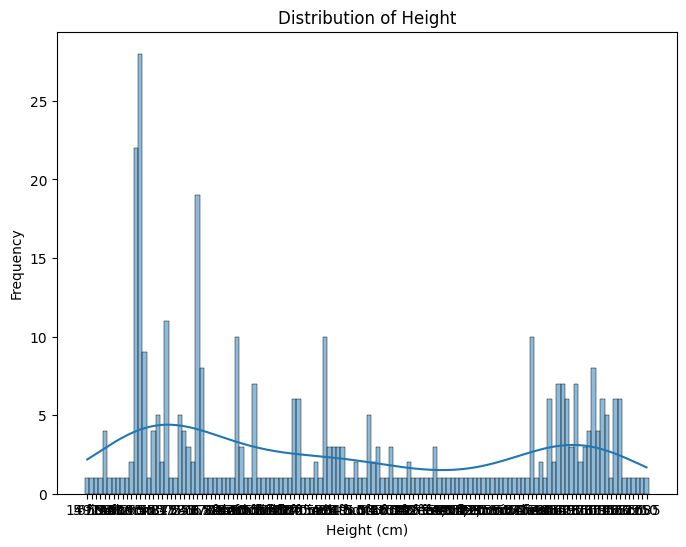

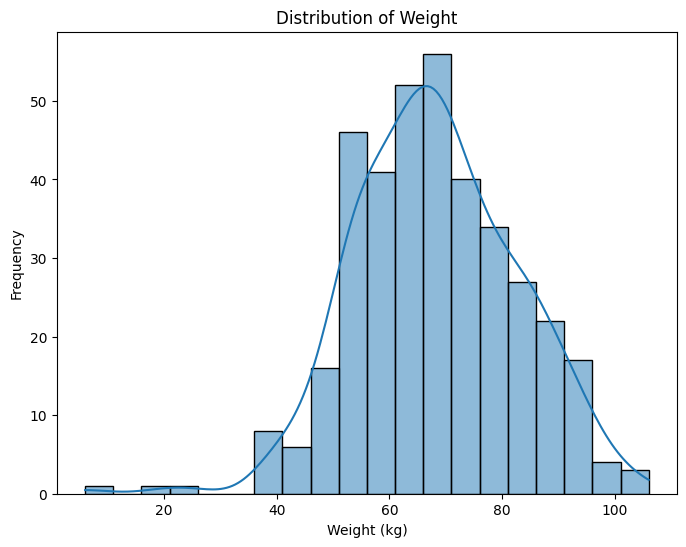

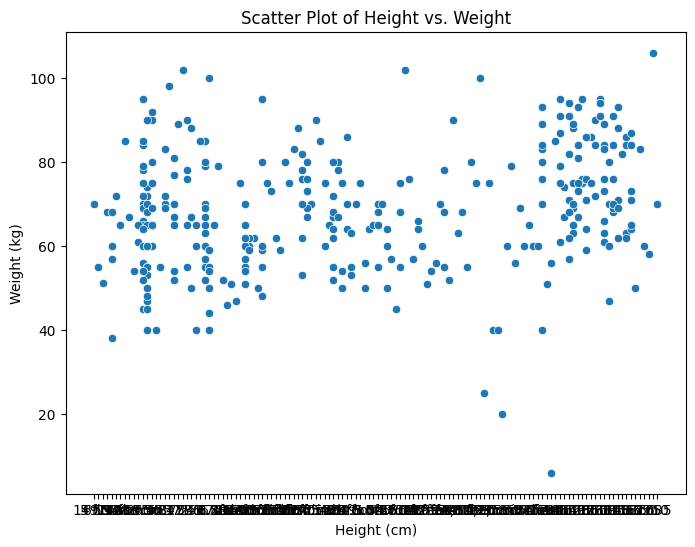

In [129]:

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Height distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Height'], bins=20, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Weight distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Height vs. Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()




In [112]:

# # Time-based analysis (assuming 'Timestamp' is in datetime format)
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df.set_index('Timestamp', inplace=True)


# # Number of records over time
# plt.figure(figsize=(12, 6))
# df.resample('M').size().plot(legend=False)
# plt.title('Number of Records Over Time')
# plt.xlabel('Time')
# plt.ylabel('Number of Records')
# plt.show()

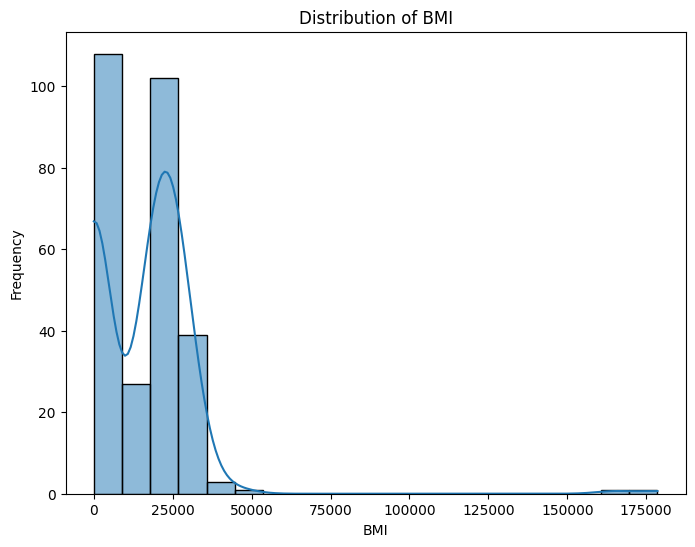

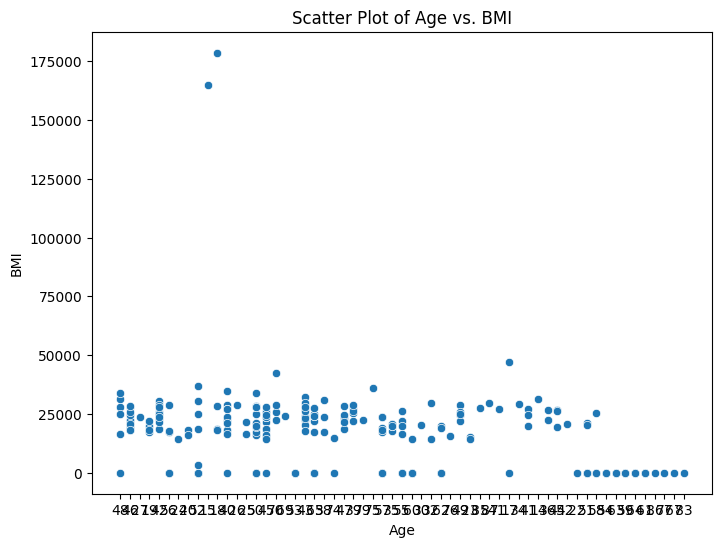

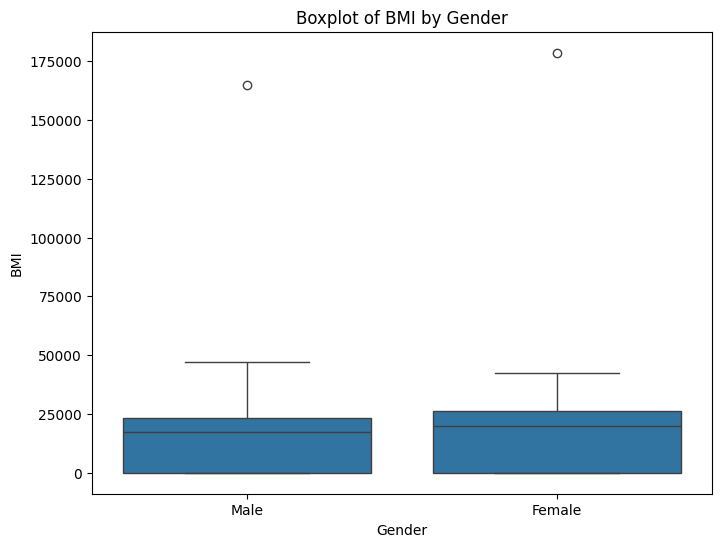

In [134]:
# Distribution of BMI
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of BMI vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', data=df)
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Boxplot of BMI by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=df)
plt.title('Boxplot of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()